In [2]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [3]:
#Reading the dataset
data = pd.read_csv('C:/Trinity/Comp Sc/ML/Datasets/bank-additional/bank-additional-full.csv',sep=';')
data['id'] = data.index



In [6]:
#Creating a copy of the data
bank_data = data.copy()

In [143]:
bank_data_2 = bank_data.copy()

In [144]:
#Dropping rows with column > 25
bank_data_2 = bank_data_2.drop(bank_data_2[bank_data_2.campaign>25].index)

In [16]:
#Subsetting only the bank client data
bank_client_data=bank_data_2[['age','job','marital','education','default','housing','loan']].copy()

In [17]:
bank_client_data_2 = bank_client_data.copy()


In [59]:
label_mapping = {}
bank_client_data_2['job'], label_mapping['job'] = pd.factorize(bank_client_data_2['job'])
bank_client_data_2['marital'], label_mapping['marital'] = pd.factorize(bank_client_data_2['marital'])
bank_client_data_2['education'], label_mapping['education'] = pd.factorize(bank_client_data_2['education'])
bank_client_data_2['default'], label_mapping['default'] = pd.factorize(bank_client_data_2['default'])
bank_client_data_2['housing'], label_mapping['housing'] = pd.factorize(bank_client_data_2['housing'])
bank_client_data_2['loan'], label_mapping['loan'] = pd.factorize(bank_client_data_2['loan'])
print('label_mapping is  : ',label_mapping)

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}


In [60]:
#Starting with imputation of 'Job'
bank_client_data_marital=bank_client_data_2.copy()

In [68]:
np.unique(bank_client_data_marital.education)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [90]:
y = bank_client_data_marital['job']
ytest=y[y==9]
Xtest=(bank_client_data_marital[bank_client_data_marital['job']==9]).drop('job', axis=1)

In [93]:
train = (bank_client_data_marital[-(bank_client_data_marital['job']==9)])

In [94]:
Xtrain_d1=train.drop('job', axis=1)
ytrain_d1=train.job

In [103]:
Xtrain_d2 = train.copy()
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.marital==3].index)
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.education==5].index)
Xtrain_d2 = Xtrain_d2.drop(Xtrain_d2[Xtrain_d2.default==1].index)

ytrain_d2 = Xtrain_d2.job
Xtrain_d2 = Xtrain_d2.drop('job', axis=1)


In [104]:
Xtrain_d3 = train.copy()
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.marital==3].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.education==5].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.default==1].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.housing==2].index)
Xtrain_d3 = Xtrain_d3.drop(Xtrain_d3[Xtrain_d3.loan==2].index)

ytrain_d3 = Xtrain_d3.job
Xtrain_d3 = Xtrain_d3.drop('job', axis=1)
               

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

C:\Users\rujulk\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<BarContainer object of 6 artists>

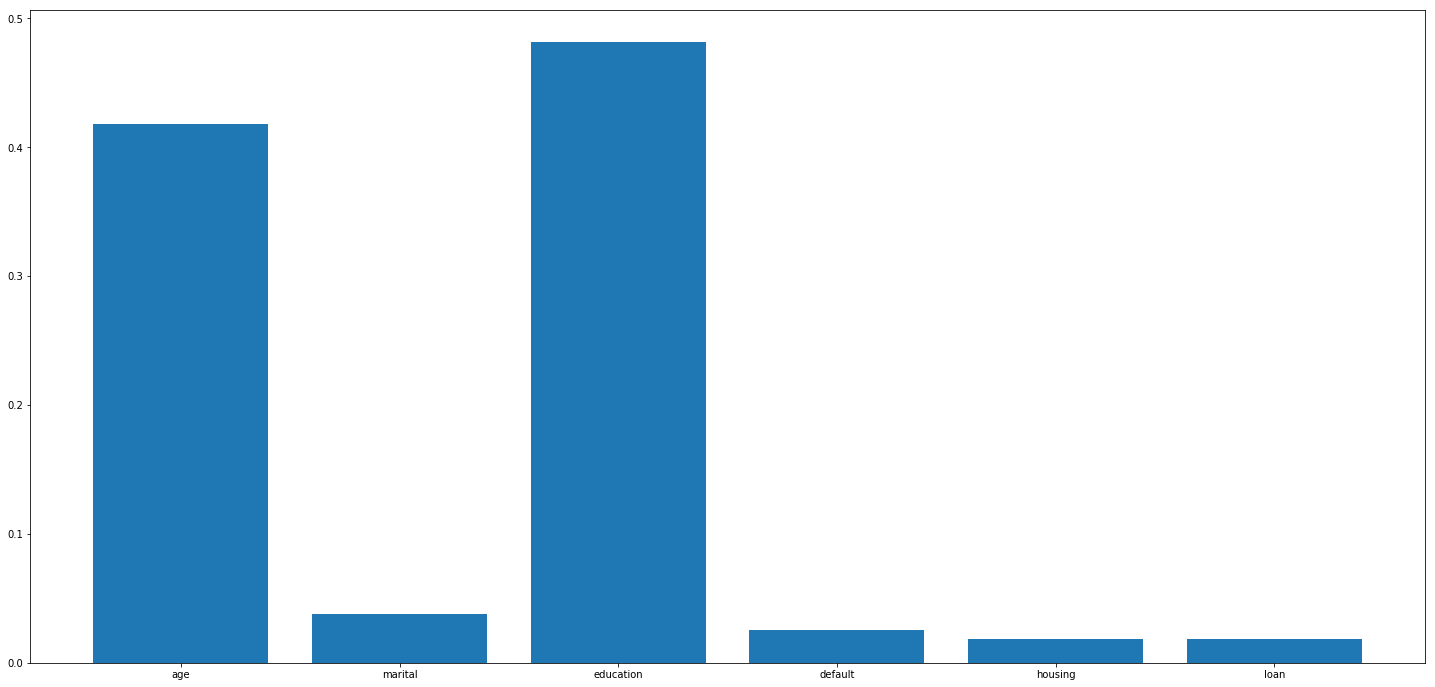

In [115]:
#Using Xtrain_d1 and ytrain_d1 
clf_d1 = RandomForestClassifier()
clf_d1.fit(Xtrain_d1, ytrain_d1)
clf_d1.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d1.columns,clf_d1.feature_importances_)

<BarContainer object of 6 artists>

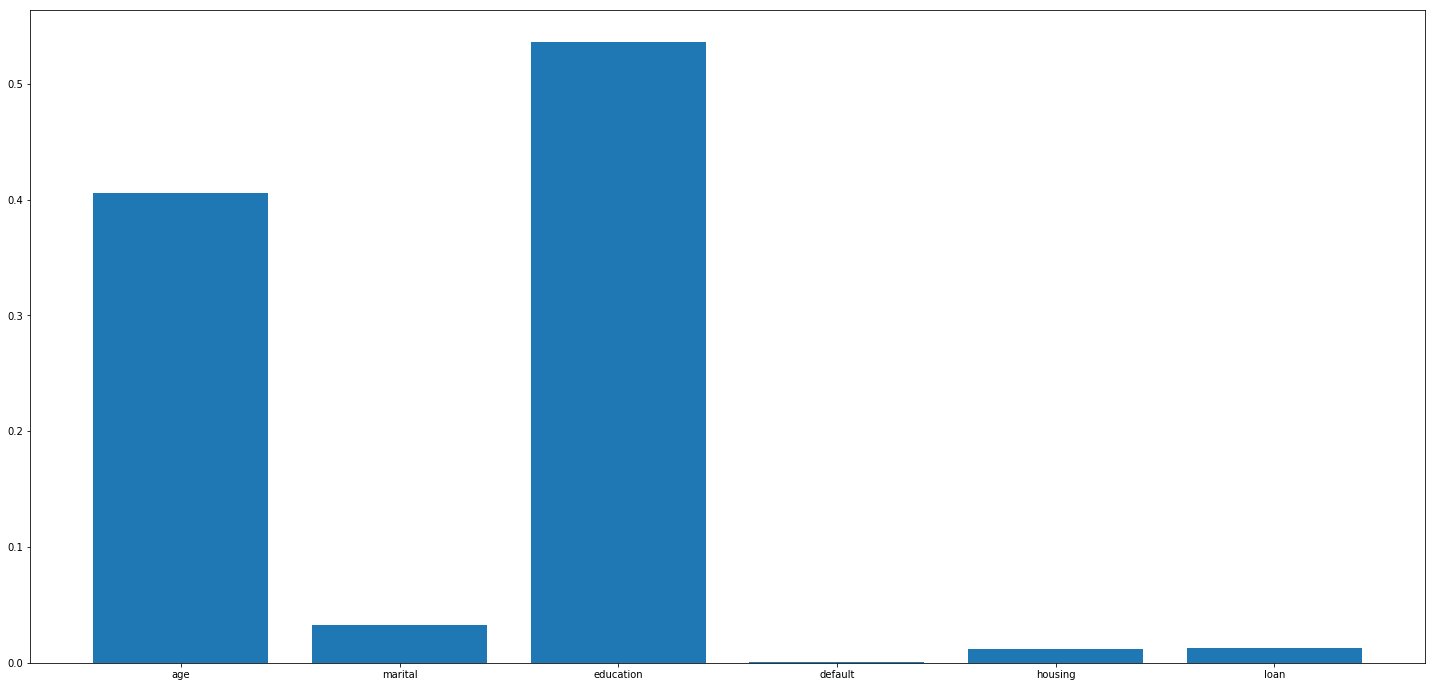

In [116]:
#Using Xtrain_d2 and ytrain_d2 
clf_d2 = RandomForestClassifier()
clf_d2.fit(Xtrain_d2, ytrain_d2)
clf_d2.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d2.columns,clf_d2.feature_importances_)

<BarContainer object of 6 artists>

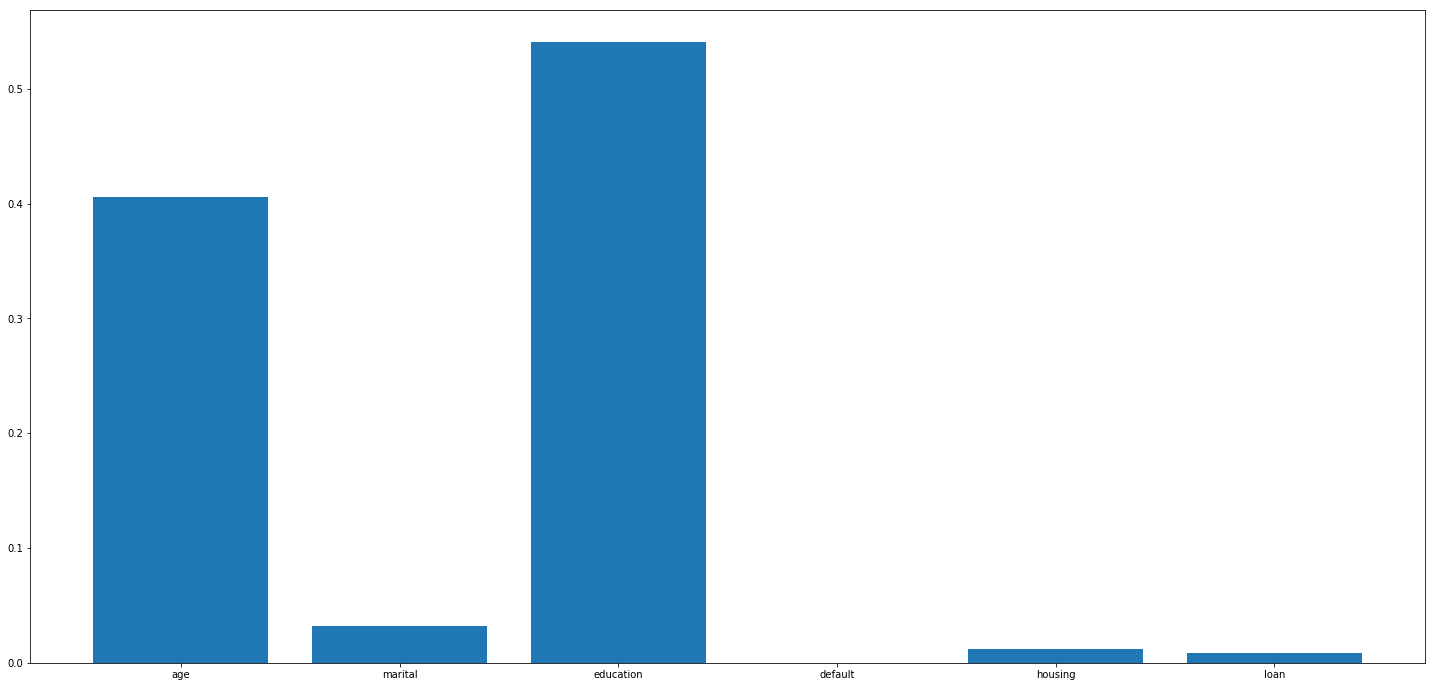

In [117]:
#Using Xtrain_d3 and ytrain_d3 
clf_d3 = RandomForestClassifier()
clf_d3.fit(Xtrain_d3, ytrain_d3)
clf_d3.feature_importances_

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(Xtrain_d3.columns,clf_d3.feature_importances_)

In [114]:
pd.value_counts(bank_client_data_marital.job)

2     10399
3      9239
4      6731
1      3958
6      2921
5      1716
10     1454
8      1417
0      1059
7      1012
11      875
9       330
Name: job, dtype: int64

In [118]:
pred_job_d1 = clf_d1.predict((Xtest))
pred_job_d2 = clf_d2.predict((Xtest))


In [119]:
pred_job_d1

array([ 6,  3,  5,  3,  1, 10,  2,  3, 11,  3,  5,  3,  5,  3,  3,  3,  3,
        1,  2,  1,  3,  3,  1,  3,  2,  3,  3,  0,  3,  2,  2,  3,  3,  2,
        2,  3,  2,  3,  4,  0,  3,  2,  1,  1,  3,  6,  3,  2,  1,  1,  1,
        1,  2,  3,  0,  1,  3,  3,  3,  4,  3,  3,  2,  6,  3,  1,  3,  3,
        3,  3,  3,  3,  3,  1,  5,  3,  3,  1,  5,  1,  3,  3,  3,  3,  1,
        5,  1,  2,  2,  2,  3,  1,  8,  1,  2,  3,  3,  1,  2,  1,  1,  3,
        3,  5,  3,  3,  3,  2,  1,  2,  2, 11,  5,  6,  3,  6,  2,  2,  3,
        5,  0,  3,  3,  3,  3,  1,  3,  3,  3,  1,  3,  3,  2,  0,  3,  2,
        2,  3,  0,  3,  4,  3,  2,  0,  3,  3,  3,  3,  3,  4,  4,  4,  0,
        1,  1,  5,  3,  1,  1,  3,  3,  6,  1,  2,  3,  3,  3,  5,  3,  4,
        2,  3,  1,  2,  3,  3,  3,  5,  3,  5,  3,  3,  5,  2,  1,  1,  2,
        2,  1,  3,  6,  1,  3,  3,  6,  6,  3,  3,  3,  2,  2,  2,  3,  2,
        3,  3,  6,  3,  4,  4,  3,  3,  2,  3,  1,  5,  1,  3,  3,  3,  4,
        7,  3,  1,  1,  3

In [121]:
pred_job_d2

array([ 2,  3,  4,  4,  2,  4,  4,  4,  4,  4,  5,  4,  4,  4,  4,  3,  3,
        1,  5,  1,  3,  3,  1,  3,  1,  3,  3,  2,  3,  1,  2,  3,  4,  4,
        2,  3,  2,  3,  5,  3,  4,  2,  1,  1,  3,  6,  3,  2,  1,  2,  4,
        4,  6,  3,  4,  4,  3,  4,  3,  4,  3,  3,  2,  6,  3,  4,  3,  3,
        3,  3,  4,  3,  3,  1,  5,  3,  3,  1,  2,  2,  3,  3,  3,  4,  2,
        5,  2,  4,  4,  2,  3,  4,  4,  4,  4,  4,  3,  3,  2,  2,  2,  4,
        3,  5,  1,  3,  3,  2,  2,  2,  4,  4,  5,  4,  3,  3,  4,  5,  3,
        5,  0,  3,  3,  4,  4,  2,  3,  3,  4,  4,  3,  4,  4,  4,  3,  4,
        4,  2,  2,  4,  4,  3,  4,  4,  4,  3,  3,  3,  3,  4,  4,  4,  0,
        1,  1,  3,  4,  4,  2,  3,  3,  6,  4,  4,  4,  3,  1,  5,  3,  4,
        2,  4,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  2,  4,  2,  4,
        2,  5,  4,  4,  5,  4,  3,  4,  4,  4,  4,  4,  2,  2,  2,  3,  2,
        3,  4,  4,  4,  4,  4,  5,  3,  2,  3,  1,  5,  2,  3,  8,  1,  1,
        4,  4,  2,  2,  5

In [122]:
c=['age','education','marital']
d=['age','education']

In [123]:
#c
Xtrain_d1_c = Xtrain_d1[c]
Xtrain_d2_c = Xtrain_d2[c]
Xtrain_d3_c = Xtrain_d3[c]

#d
Xtrain_d1_d = Xtrain_d1[d]
Xtrain_d2_d = Xtrain_d2[d]
Xtrain_d3_d = Xtrain_d3[d]


In [125]:
#c
#Using Xtrain_d1_c and ytrain_d1 
clf_d1_c = RandomForestClassifier()
clf_d1_c.fit(Xtrain_d1_c, ytrain_d1)

#Using Xtrain_d2_c and ytrain_d2 
clf_d2_c = RandomForestClassifier()
clf_d2_c.fit(Xtrain_d2_c, ytrain_d2)

#Using Xtrain_d3_c and ytrain_d3 
clf_d3_c = RandomForestClassifier()
clf_d3_c.fit(Xtrain_d3_c, ytrain_d3)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
Xtest_c = Xtest[c]
Xtest_d = Xtest[d]

In [128]:
pred_job_d1_c = clf_d1_c.predict((Xtest_c))
pred_job_d2_c = clf_d2_c.predict((Xtest_c))


In [129]:
pred_job_d1_c

array([ 6,  3,  3,  3,  2,  3,  6,  3,  2,  3,  5,  3,  2,  2,  2,  3,  3,
        2,  3,  2,  3,  3,  3,  3,  2,  3,  3, 10,  3,  2,  2,  3,  2,  3,
        2,  3,  2,  3,  5,  3,  3,  2,  2,  2,  3,  2,  3,  2,  2,  1,  2,
        2,  2,  3,  3,  2,  3,  2,  3,  4,  2,  3, 10,  2,  3,  1,  3,  3,
        3,  3,  3,  3,  3,  2,  5,  3,  3,  2,  2,  1,  3,  3,  3,  2,  1,
        5,  2,  2,  2, 10,  3,  2,  2,  2,  2,  3,  3,  3,  2,  2,  1,  3,
        3,  5,  0,  3,  3,  3,  2,  2,  2,  2,  5,  2,  3,  3,  3,  2,  3,
        5,  3,  3,  3,  3,  2,  1,  3,  3,  3,  1,  3,  3,  2,  2,  3,  2,
        3,  2, 10,  3,  4,  3,  2,  3,  2,  3,  3,  3,  5,  4,  4,  4,  8,
        8,  8,  0,  3,  3,  2,  3,  3,  6,  2,  2,  2,  3,  3,  5,  3,  4,
        2,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  3,
        2,  5,  3,  3,  5,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  3,  2,
        3,  2,  3,  3,  3,  2,  3,  3,  2,  3,  1,  5,  1,  3,  3,  1,  4,
        4,  3,  2,  2,  2

In [130]:
#Considering
pred_job_d2_c

array([ 6,  3,  4,  4,  2,  4,  4,  4,  4,  4,  5,  4,  2,  4,  4,  3,  3,
        2,  5,  2,  3,  3,  3,  3,  1,  3,  3,  2,  3,  1,  2,  3,  4,  4,
        2,  3,  2,  3,  5,  3,  4,  2,  4,  2,  3,  2,  3,  6,  2,  2,  4,
        4,  2,  3,  4,  4,  3,  4,  3,  4,  1,  3,  2,  2,  3,  2,  3,  3,
        3,  3,  4,  3,  3,  2,  5,  3,  3,  2,  6,  1,  3,  3,  3,  4,  2,
        5,  2,  4,  4,  2,  3,  4,  4,  4,  4,  4,  3,  0,  2,  2,  2,  4,
        3,  5,  4,  3,  3,  4,  2,  2,  4,  4,  5,  4,  3,  3,  4,  6,  2,
        5,  3,  3,  1,  4,  4,  2,  3,  3,  4,  2,  3,  4,  4,  4,  3,  4,
        4,  2,  2,  4,  4,  3,  4,  4,  4,  3,  3,  3, 10,  4,  4,  4,  2,
        2,  2,  5,  4,  4,  2,  3,  3,  6,  4,  2,  4,  3,  3,  5,  3,  4,
        2,  4,  4,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  2,  4,  2,  4,
        2,  5,  4,  4,  5,  4,  3,  4,  4,  4,  4,  4,  2,  2,  2,  3,  2,
        3,  4,  4,  4,  4,  4,  5,  3,  2,  3,  1,  5,  1,  3,  4,  1,  4,
        4,  4,  2,  2,  5

In [131]:
#d
#Using Xtrain_d1_c and ytrain_d1 
clf_d1_d = RandomForestClassifier()
clf_d1_d.fit(Xtrain_d1_d, ytrain_d1)

#Using Xtrain_d2_c and ytrain_d2 
clf_d2_d = RandomForestClassifier()
clf_d2_d.fit(Xtrain_d2_d, ytrain_d2)

#Using Xtrain_d3_c and ytrain_d3 
clf_d3_d = RandomForestClassifier()
clf_d3_d.fit(Xtrain_d3_d, ytrain_d3)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
pred_job_d1_d = clf_d1_d.predict((Xtest_d))
pred_job_d2_d = clf_d2_d.predict((Xtest_d))


In [133]:
pred_job_d1_d

array([2, 3, 3, 3, 2, 3, 3, 3, 1, 3, 5, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 5, 3, 3, 2, 3, 2,
       3, 2, 3, 6, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 5, 3, 3, 2, 6, 2, 3, 3, 3, 3, 2, 5, 2, 3,
       3, 2, 3, 3, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 3, 5, 3, 3, 3, 3, 2, 2,
       3, 1, 5, 3, 3, 3, 3, 6, 3, 5, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 4, 3, 3, 3, 2, 3, 3, 3, 5, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 4, 3, 3, 5, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 4, 3, 3, 3, 3, 4, 2, 2, 2, 3, 1, 5, 3, 3, 5, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 3, 4, 4, 2, 3, 3, 2, 3, 2, 5, 2, 3, 3, 2,
       4, 4, 3, 1, 1, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 5, 4, 2, 5, 2,
       2, 2, 3, 3, 3, 3, 5, 5, 5, 5, 5, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 5,
       4, 3, 3, 2, 5, 2, 5, 5, 5, 3, 5, 5, 5, 2, 2,

In [134]:
#Considering
pred_job_d2_d

array([2, 3, 4, 4, 2, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 3, 3, 2, 5, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 4, 4, 2, 3, 2, 3, 5, 3, 4, 2, 4, 2,
       3, 2, 3, 2, 2, 2, 4, 4, 2, 3, 4, 4, 3, 4, 3, 4, 3, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 4, 3, 3, 2, 5, 3, 3, 2, 2, 2, 3, 3, 3, 4, 2, 5, 2, 4,
       4, 2, 3, 4, 4, 4, 4, 4, 3, 1, 5, 2, 2, 4, 3, 5, 4, 3, 3, 4, 2, 2,
       4, 4, 5, 4, 3, 3, 4, 2, 3, 5, 3, 3, 3, 4, 4, 2, 3, 3, 4, 2, 3, 4,
       4, 4, 3, 4, 4, 2, 2, 4, 4, 3, 4, 4, 4, 3, 3, 3, 5, 4, 4, 4, 3, 3,
       3, 5, 4, 4, 2, 3, 3, 6, 4, 2, 4, 3, 3, 5, 3, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 5, 4, 4, 5, 4, 3, 4, 4, 4, 4,
       4, 2, 2, 2, 3, 2, 3, 4, 4, 4, 4, 4, 5, 3, 2, 3, 2, 5, 2, 3, 4, 2,
       4, 4, 4, 2, 2, 5, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 2, 4, 5, 4, 2, 5, 2,
       2, 2, 3, 3, 4, 3, 5, 5, 5, 5, 5, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 5,
       4, 5, 4, 2, 5, 2, 5, 5, 5, 4, 5, 5, 5, 2, 2,

In [ ]:
#Considering final
pred_job_d2_c
pred_job_d2_d

In [145]:
bank_data_3 = bank_data_2.copy()

In [147]:
#------------------------------------ data imputation -----------------------------------------------------
#pred_job_d2_c
bank_data_3.loc[bank_data_3.job=='unknown','job'] = pred_job_d2_c



In [148]:
bank_data_3.loc[bank_data_3.job==0,'job'] = 'housemaid'
bank_data_3.loc[bank_data_3.job==1,'job'] = 'services'
bank_data_3.loc[bank_data_3.job==2,'job'] = 'admin'
bank_data_3.loc[bank_data_3.job==3,'job'] = 'blue-collar'
bank_data_3.loc[bank_data_3.job==4,'job'] = 'technician'
bank_data_3.loc[bank_data_3.job==5,'job'] = 'retired'
bank_data_3.loc[bank_data_3.job==6,'job'] = 'management'
bank_data_3.loc[bank_data_3.job==7,'job'] = 'unemployed'
bank_data_3.loc[bank_data_3.job==8,'job'] = 'self-employed'
bank_data_3.loc[bank_data_3.job==10,'job'] = 'entrepreneur'
bank_data_3.loc[bank_data_3.job==11,'job'] = 'student'


In [151]:
bank_data_4 = bank_data_2.copy()


In [152]:
#pred_job_d2_d
bank_data_4.loc[bank_data_4.job=='unknown','job'] = pred_job_d2_d



In [153]:
bank_data_4.loc[bank_data_4.job==0,'job'] = 'housemaid'
bank_data_4.loc[bank_data_4.job==1,'job'] = 'services'
bank_data_4.loc[bank_data_4.job==2,'job'] = 'admin'
bank_data_4.loc[bank_data_4.job==3,'job'] = 'blue-collar'
bank_data_4.loc[bank_data_4.job==4,'job'] = 'technician'
bank_data_4.loc[bank_data_4.job==5,'job'] = 'retired'
bank_data_4.loc[bank_data_4.job==6,'job'] = 'management'
bank_data_4.loc[bank_data_4.job==7,'job'] = 'unemployed'
bank_data_4.loc[bank_data_4.job==8,'job'] = 'self-employed'
bank_data_4.loc[bank_data_4.job==10,'job'] = 'entrepreneur'
bank_data_4.loc[bank_data_4.job==11,'job'] = 'student'


In [154]:
bank_data_3.to_csv('bank_data_3_job.csv')

In [155]:
bank_data_4.to_csv('bank_data_4_job.csv')